In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [2]:
#  define data 
data = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
noc = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [3]:
# merge data 
df = pd.merge(data, noc, on='NOC', how='left')

In [4]:
# africa countries
AFR=["ALG","EGY","LBA","MAR","SUD","TUN","BEN","BUR","CPV","GAM","GHA","GUI","GBS","CIV","LBR","MLI","MTN","NIG","NGR","SEN","SLE","TOG","CMR","CAF","STP","GAB","GEQ","COD","CGO","CHA","COM","BOT","ANG","BDI","DJI","ERI","ETH","KEN","RWA","SEY","SOM","SSD","TAN","UGA","SWZ","LES","MAD","MAW","MRI","MOZ","NAM","RSA","ZAM","ZIM"]

In [5]:
# data of africa
df = df.loc[df.NOC.isin(AFR)].copy()

In [6]:
# info of data
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN,Morocco,NaN
146,53,Talaat Abada,M,24.0,172.0,58.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Men's Flyweight,NaN,Egypt,NaN
160,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,NaN,Chad,NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN,Sudan,NaN
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,Cameroon,NaN


In [7]:
df.shape

(11980, 17)

In [8]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [9]:
df.describe()

,ID,Age,Height,Weight,Year
count,11980.000000,11158.000000,9400.000000,9487.000000,11980.000000
mean,60558.761269,24.651999,174.870319,69.110520,1988.544908
std,39491.521674,5.046257,10.193306,13.652657,22.719997
min,48.000000,11.000000,127.000000,36.000000,1904.000000
25%,28152.000000,21.000000,168.000000,60.000000,1980.000000
50%,59669.500000,24.000000,175.000000,68.000000,1992.000000
75%,89219.250000,27.000000,181.250000,76.000000,2006.000000
max,135497.000000,59.000000,216.000000,163.000000,2016.000000


In [10]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [11]:
# clean data
df.duplicated().sum()

14

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age         811
Height     2566
Weight     2479
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     11398
region        0
notes     11966
dtype: int64

In [14]:
# age is important in sport, 811 athlete has no age, 798 didn't get medal, 13 did
sum(df[df['Age'].isna()] ['Medal'].isna())

798

(-1.1058934881854414,
 1.149909752561447,
 -1.1091085772430263,
 1.1809525726553631)

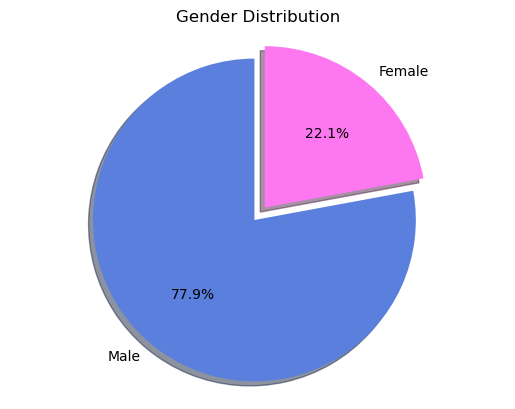

In [15]:
Sex=['Male','Female']
cnt=[11966-2644,2644]
explode=(0,0.1)
plt.pie(x=cnt, labels=Sex, explode=explode,autopct='%1.1f%%', startangle=90, shadow=True, colors=['#5A7FDD','#FD78F0'])
plt.title("Gender Distribution")
plt.axis('equal')

In [16]:
# medals data 
med = df[~(df.Medal.isna())].copy()

In [17]:
med.shape
# 568 athlete got medals

(568, 17)

In [18]:
med.describe()

,ID,Age,Height,Weight,Year
count,568.000000,555.000000,465.000000,470.000000,568.000000
mean,64105.281690,24.036036,174.466667,66.719149,1988.450704
std,40272.899277,4.410211,10.049204,13.508343,27.383378
min,76.000000,15.000000,138.000000,40.000000,1908.000000
25%,28313.000000,21.000000,168.000000,57.000000,1980.000000
50%,61878.500000,23.000000,175.000000,65.000000,1996.000000
75%,98969.250000,27.000000,181.000000,76.000000,2008.000000
max,133979.000000,42.000000,207.000000,140.000000,2016.000000


(-1.113600394710183,
 1.1135406256634237,
 -1.1045774525440974,
 1.1002180048135393)

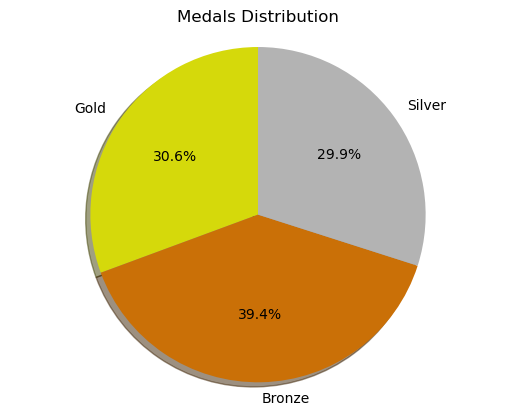

In [19]:
# medal distribution
medal=['Gold','Bronze','Silver']
cnt=[174,224,170]
plt.pie(x=cnt, labels=medal, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#D5D90B','#CA7007','0.7'])
plt.title("Medals Distribution")
plt.axis('equal')

Text(0, 0.5, 'country')

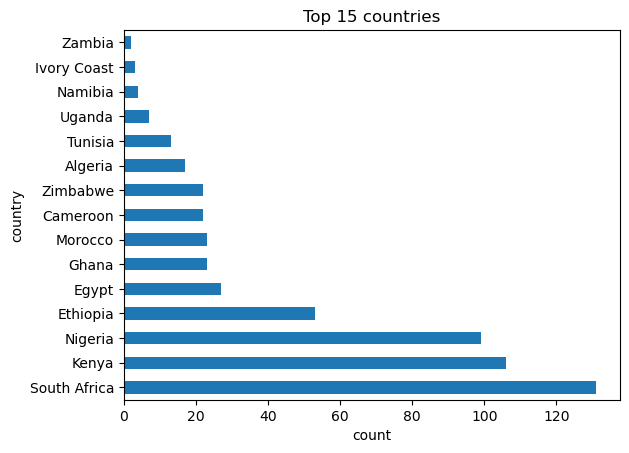

In [20]:
# top 15 countries
ax = med['region'].value_counts().head(15).plot(kind='barh', title='Top 15 countries')
ax.set_xlabel('count')
ax.set_ylabel('country')

Text(0.5, 1.0, 'Medals per Year')

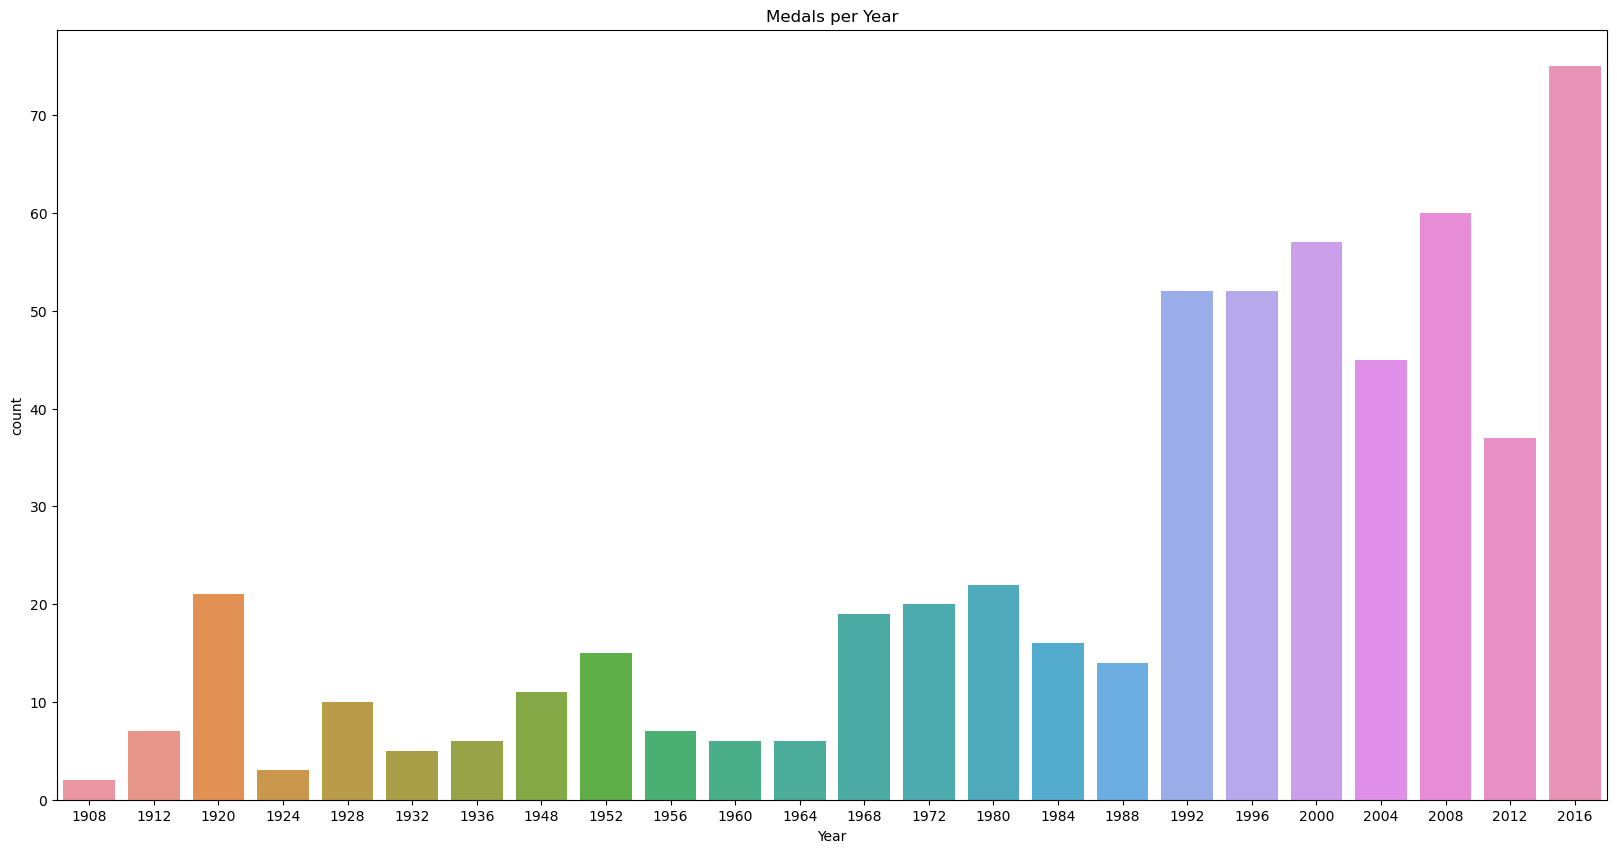

In [21]:
# medals per year
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=med)
plt.style.use('seaborn')
plt.title('Medals per Year')

Text(0.5, 1.0, 'Medals per Age')

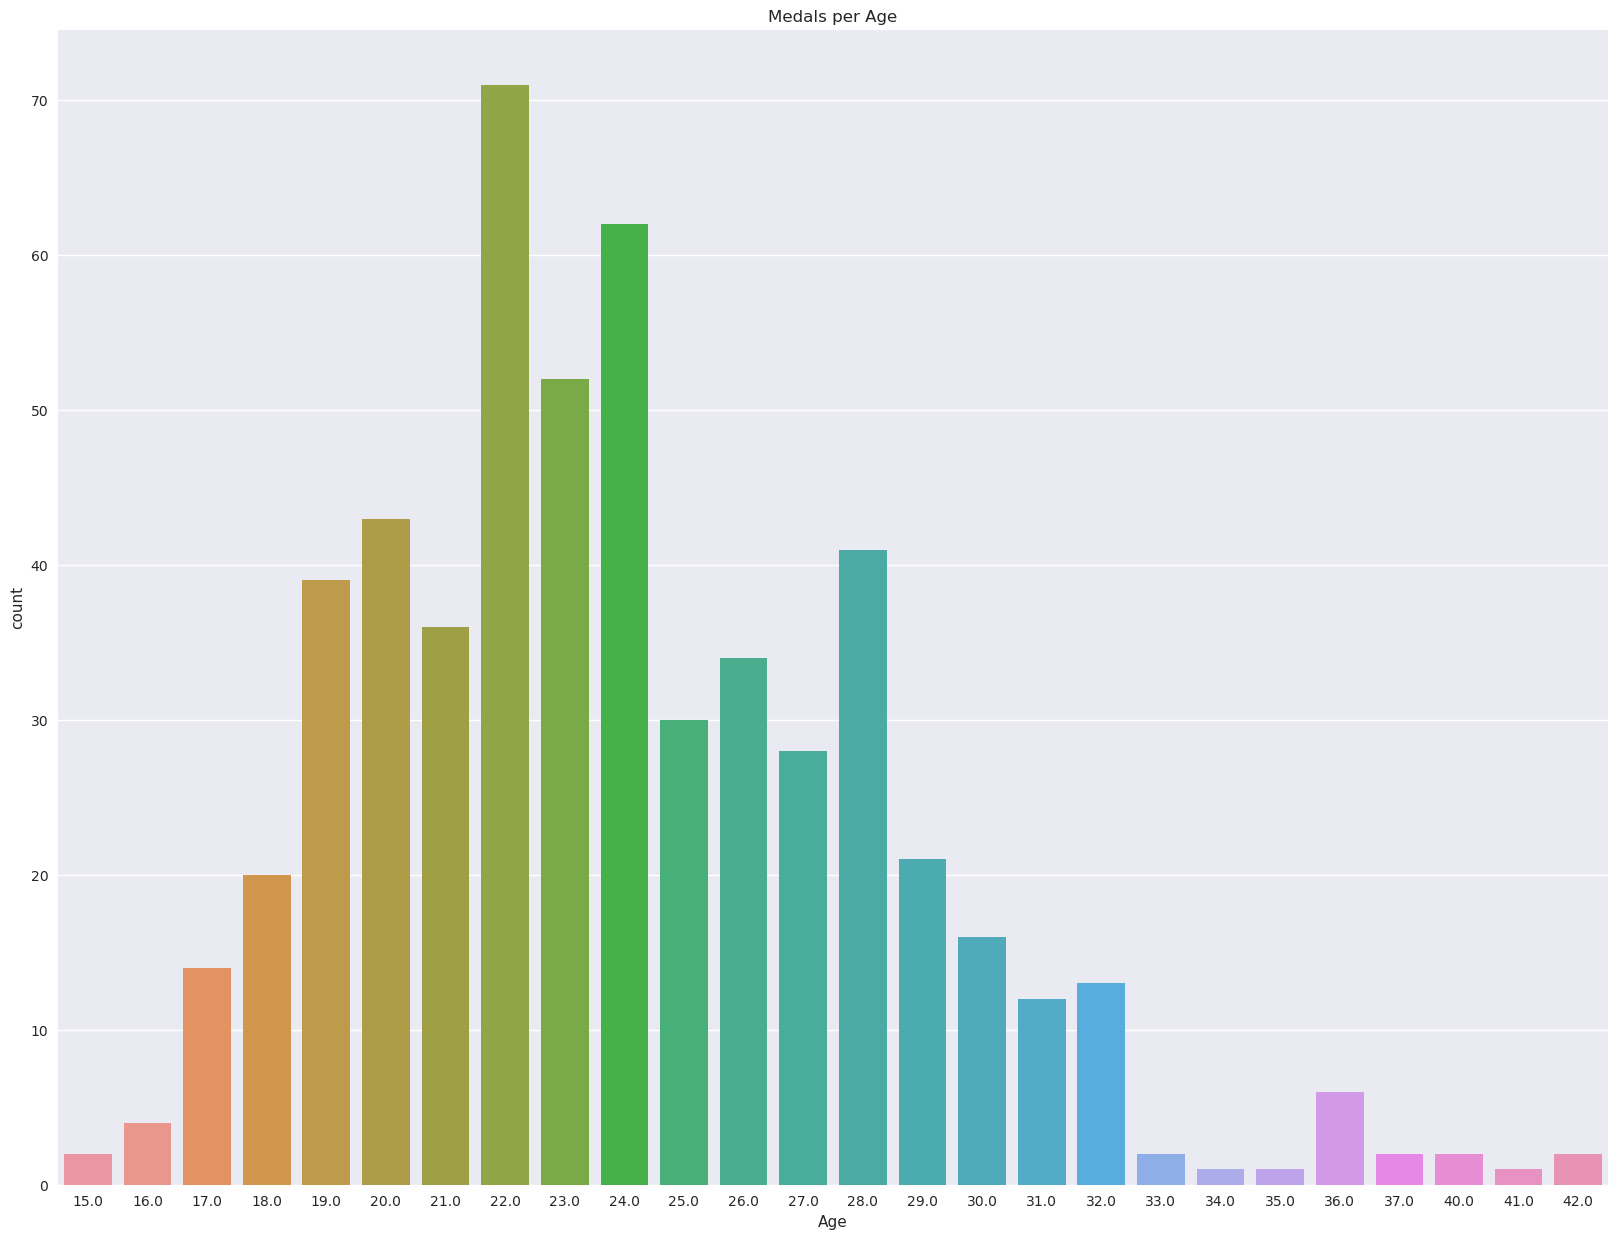

In [22]:
# medals per age
plt.figure(figsize=(20, 15))
sns.countplot(x='Age', data=med)
plt.style.use('seaborn')
plt.title('Medals per Age')

(-1.1063682942883544,
 1.1535988182456312,
 -1.1092048353543373,
 1.180400165769683)

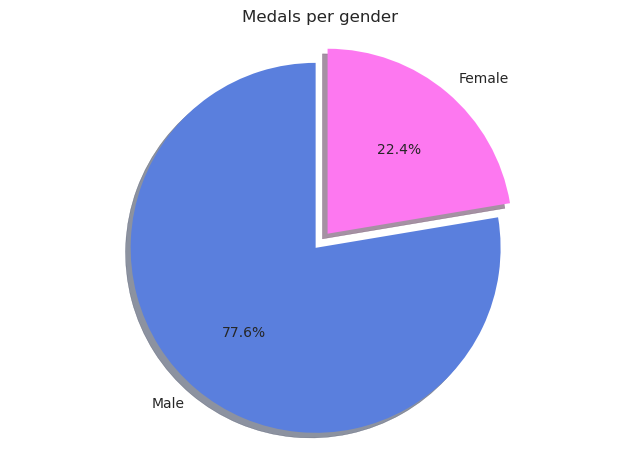

In [23]:
# medal per gender
Sex=['Male','Female']
cnt=[441,127]
explode=(0,0.1)
plt.pie(x=cnt, labels=Sex, explode=explode,autopct='%1.1f%%', startangle=90, shadow=True, colors=['#5A7FDD','#FD78F0'])
plt.title("Medals per gender")
plt.axis('equal')